# Introduction


Credit risk prediction is an effective way of evaluating whether a potential borrower will repay a loan, particularly in peer-to-peer lending where class imbalance problems are prevalent.


**Solution explanation:** We will create a machine learning model that can identify if a loan is potentially bad / risky loan. It can be used as an investment decision tools. If our model is reliable, our investment in risky loans will decrease, our loss can be minimized and our net profit margin should increase.

**Data:** Lending club credit loan data between 2007 - 2014

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.options.display.max_columns = None




#pd.options.display.max_rows = None

# Data Overview

In [2]:
dataset = pd.read_csv('/kaggle/input/loan-data-2007-2014/loan_data_2007_2014/loan_data_2007_2014.csv')
df = dataset.copy()

In [3]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

# Assigning Target Column


We'll classify the loan endings as follows:

Risky loans / bad loans = ["Charged Off", "Late (31-120 days)", "Late (16-30 days)", "Default", "Does not meet the credit policy. Status:Charged Off"]

In [7]:
df['bad_loan'] = np.where(df['loan_status'].isin(['Charged Off','Default','Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 1, 0)

df[['loan_status','bad_loan']].head()

,loan_status,bad_loan
0,Fully Paid,0
1,Charged Off,1
2,Fully Paid,0
3,Fully Paid,0
4,Current,0


#  Data Prepocessing

## Dropping Unecessary Columns

### The follwing features are identifiers and can not be used in building model. 

Unnamed: 0, id, member id, url, title, desc, zipcode and emp_title

In [8]:
df.drop(columns=['Unnamed: 0', 'id', 'member_id', 'url', 'title', 'desc', 'zip_code' ,'emp_title'],\
        inplace=True)

### Removing columns which are more than 50% empty

In [9]:
na_col = df.isna().mean()
na_col[na_col >0.5]

mths_since_last_delinq         0.536906
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

### Removing columns with less than 2 unique values 

In [10]:
df.nunique()[(df.nunique()<2) | (df.nunique() == len(df))]

policy_code                  1
application_type             1
annual_inc_joint             0
dti_joint                    0
verification_status_joint    0
open_acc_6m                  0
open_il_6m                   0
open_il_12m                  0
open_il_24m                  0
mths_since_rcnt_il           0
total_bal_il                 0
il_util                      0
open_rv_12m                  0
open_rv_24m                  0
max_bal_bc                   0
all_util                     0
inq_fi                       0
total_cu_tl                  0
inq_last_12m                 0
dtype: int64

In [11]:
# removing these columns

del_col = list(df.nunique()[(df.nunique()<2) | (df.nunique() == len(df))].index)
na_col = list(na_col[na_col >0.5].index)
cols = set(del_col + na_col)

df.drop(cols,axis=1,inplace=True)
df.shape

(466285, 46)

In [12]:
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

Data understanding is important. We wanted to predict whether giving loan is risky or not, before we invest in the loan, not after. The problem with our data is some features/columns are related to the current status of the loan so we need to remove them also from our dataset.

* Columns related to the current status of the loan (after it is issued): 'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', next_pymnt_d'

The sub_grade column wll also be droped as it contains the same information as the grade column.

The funded_amnt and funded_amnt_inv columns will also be droped as it contains the same information as the loan_amnt column




In [13]:
drop_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d','sub_grade','funded_amnt','funded_amnt_inv']

df.drop(drop_col,axis=1,inplace=True)
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,NaN,NaN,NaN,0
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,NaN,NaN,NaN,1
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,NaN,NaN,NaN,0
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,NaN,NaN,NaN,0
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,other,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,0.0,0.0,NaN,NaN,NaN,0


In [14]:
df[df['tot_cur_bal'].notnull()].head(3)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_loan
42535,27050,36 months,10.99,885.46,B,10+ years,OWN,55000.0,Verified,debt_consolidation,MI,22.87,0.0,Oct-86,0.0,14.0,0.0,36638,61.2,27.0,w,0.0,0.0,0.0,114834.0,59900.0,0
42536,9750,36 months,13.98,333.14,C,1 year,RENT,26000.0,Not Verified,debt_consolidation,CA,25.12,0.0,Jan-07,0.0,12.0,0.0,7967,52.8,28.0,f,0.0,0.0,0.0,14123.0,15100.0,0
42537,12000,36 months,6.62,368.45,A,10+ years,MORTGAGE,105000.0,Not Verified,debt_consolidation,CT,14.05,0.0,Mar-94,1.0,12.0,0.0,13168,21.6,22.0,w,0.0,0.0,0.0,267646.0,61100.0,0


## Handling Missing Data


'emp_length', 'annual_inc', 'delinq_2yrs','earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec','total_acc','revol_util', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' 

In [15]:
df.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
total_rev_hi_lim              70276
bad_loan                          0
dtype: int64

In [16]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'bad_loan'],
      dtype='object')

In [17]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
dataset[df['emp_length'].isnull()][['emp_length','emp_title']]

,emp_length,emp_title
168,NaN,NaN
323,NaN,NaN
394,NaN,NaN
422,NaN,NaN
439,NaN,NaN
...,...,...
466254,NaN,NaN
466256,NaN,NaN
466262,NaN,NaN
466265,NaN,NaN


In [19]:
# converting emp_length to numeric and assign NaN to zero while assigning < 1 year to 0.5

df['emp_length'] = df['emp_length'].str.replace('years','').str.replace('year','').str.strip().str.replace('< 1','0.5').str.strip('+')

df['emp_length'] = df['emp_length'].astype(float)
df['emp_length'] = df['emp_length'].replace(np.nan,0)

# renaming column name
df.rename(columns={'emp_length':'emp_length_years'},inplace=True)

df['emp_length_years']

0         10.0
1          0.5
2         10.0
3         10.0
4          1.0
          ... 
466280     4.0
466281    10.0
466282     7.0
466283     3.0
466284    10.0
Name: emp_length_years, Length: 466285, dtype: float64

In [20]:
df['annual_inc'].mean(),df['annual_inc'].median()

(73277.38147046522, 63000.0)

<Axes: >

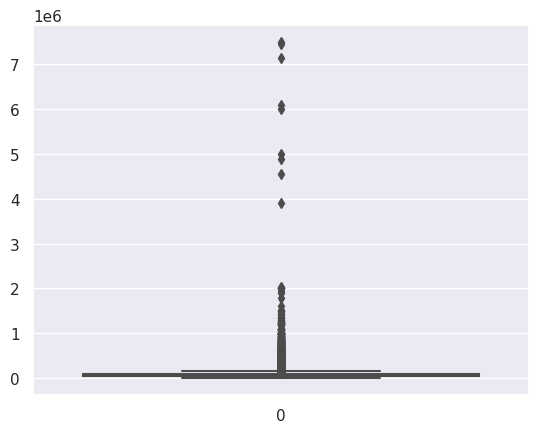

In [21]:
sns.boxplot(df['annual_inc'])

In [22]:
df['annual_inc'] = df['annual_inc'] = df['annual_inc'].fillna(df['annual_inc'].median())

**These features have same number of empty values and on same index**

'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'acc_now_delinq' 

**so we can ignore the records where these features are null beacause only there is only 29 null values.**

In [23]:
del_rows = df[df['delinq_2yrs'].isnull()].index

df.drop(del_rows,axis=0,inplace=True)


In [24]:
df = df.reset_index(drop=True)

In [25]:
df.isna().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length_years                  0
home_ownership                    0
annual_inc                        0
verification_status               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      311
total_acc                         0
initial_list_status               0
collections_12_mths_ex_med      116
acc_now_delinq                    0
tot_coll_amt                  70247
tot_cur_bal                   70247
total_rev_hi_lim              70247
bad_loan                          0
dtype: int64

In [26]:
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0     462226
1.0       3665
2.0        219
3.0         19
4.0          7
6.0          1
16.0         1
20.0         1
5.0          1
Name: count, dtype: int64

In [27]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [28]:
df['revol_util'].value_counts()

revol_util
0.00      2284
58.00      864
53.00      850
59.00      845
61.00      832
          ... 
8.49         1
88.48        1
7.43         1
11.63        1
141.80       1
Name: count, Length: 1269, dtype: int64

In [29]:
df['revol_util'] = df['revol_util'].fillna(0)

In [30]:
df['tot_coll_amt'].value_counts()

tot_coll_amt
0.0        346259
50.0          837
100.0         650
75.0          515
60.0          309
            ...  
13779.0         1
15036.0         1
15986.0         1
2477.0          1
6532.0          1
Name: count, Length: 6321, dtype: int64

In [31]:
for i in ['tot_coll_amt','total_rev_hi_lim','tot_cur_bal']:
    df[i] = df[i].fillna(0)

In [32]:
a = df.isna().sum()
a[a>0]

Series([], dtype: int64)

**No Missing Data Now :)**

## Features Data Types

Some features data type need to be changed like

term

earliesr_cr_line

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466256 entries, 0 to 466255
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466256 non-null  int64  
 1   term                        466256 non-null  object 
 2   int_rate                    466256 non-null  float64
 3   installment                 466256 non-null  float64
 4   grade                       466256 non-null  object 
 5   emp_length_years            466256 non-null  float64
 6   home_ownership              466256 non-null  object 
 7   annual_inc                  466256 non-null  float64
 8   verification_status         466256 non-null  object 
 9   purpose                     466256 non-null  object 
 10  addr_state                  466256 non-null  object 
 11  dti                         466256 non-null  float64
 12  delinq_2yrs                 466256 non-null  float64
 13  earliest_cr_li

In [34]:
df['term'] = df['term'].str.replace('months','').str.strip()
df['term'] = df['term'].astype(object)

In [35]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y').dt.year
df['earliest_cr_line'] = df['earliest_cr_line'].astype('object')

**Done!!!**

# EDA

In [36]:
df.bad_loan.value_counts()

bad_loan
0    415291
1     50965
Name: count, dtype: int64

<Axes: xlabel='bad_loan', ylabel='count'>

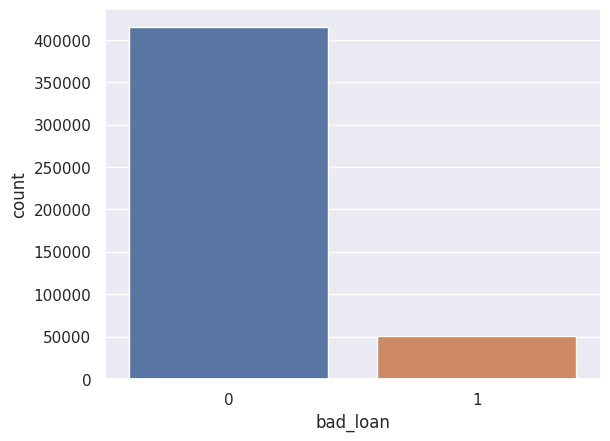

In [37]:
# plt.figure(figsize=(12,5))

sns.countplot(df,x='bad_loan')

### Storing numeric, categorical and target features names in separate variables simplifies the process of EDA.

In [38]:
numeric_features = list(df.select_dtypes(["float64" , "int64",'int32']).columns)
n = numeric_features.index('bad_loan')
del n

categorical_features = list(df.select_dtypes("object").columns)

target = "bad_loan"

print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')


numeric_features:
['loan_amnt', 'int_rate', 'installment', 'emp_length_years', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'bad_loan']

categorical_features:
['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status']

target:
bad_loan


## Numeric Features  Visualization

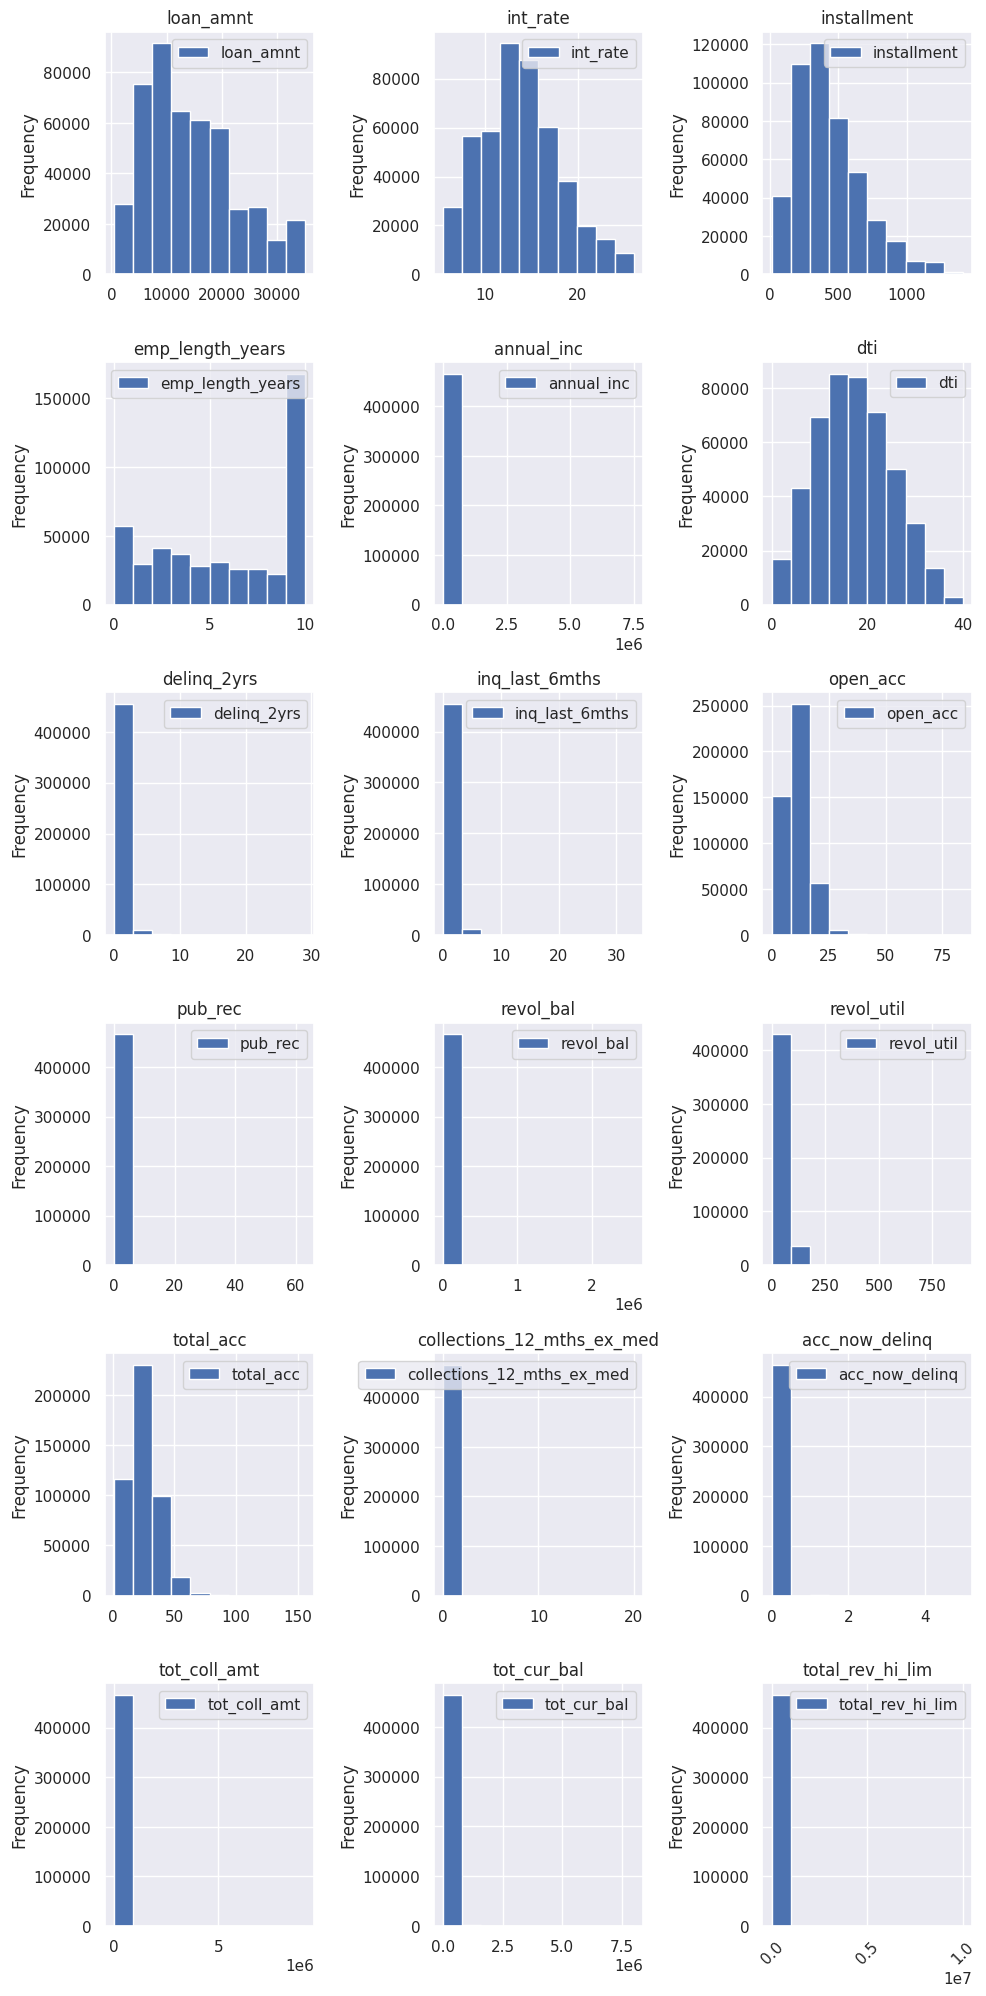

In [39]:
fig,ax = plt.subplots(6,3,figsize=(10,20) ,)
row = col = 0
for n,i in enumerate(numeric_features):

    try:

        if (n%3 == 0) & (n > 0):
            row += 1
            col = 0
        df[i].plot(kind="hist",ax=ax[row,col],legend=target)
        ax[row,col].set_title(i)
        col += 1

    except:
        pass

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

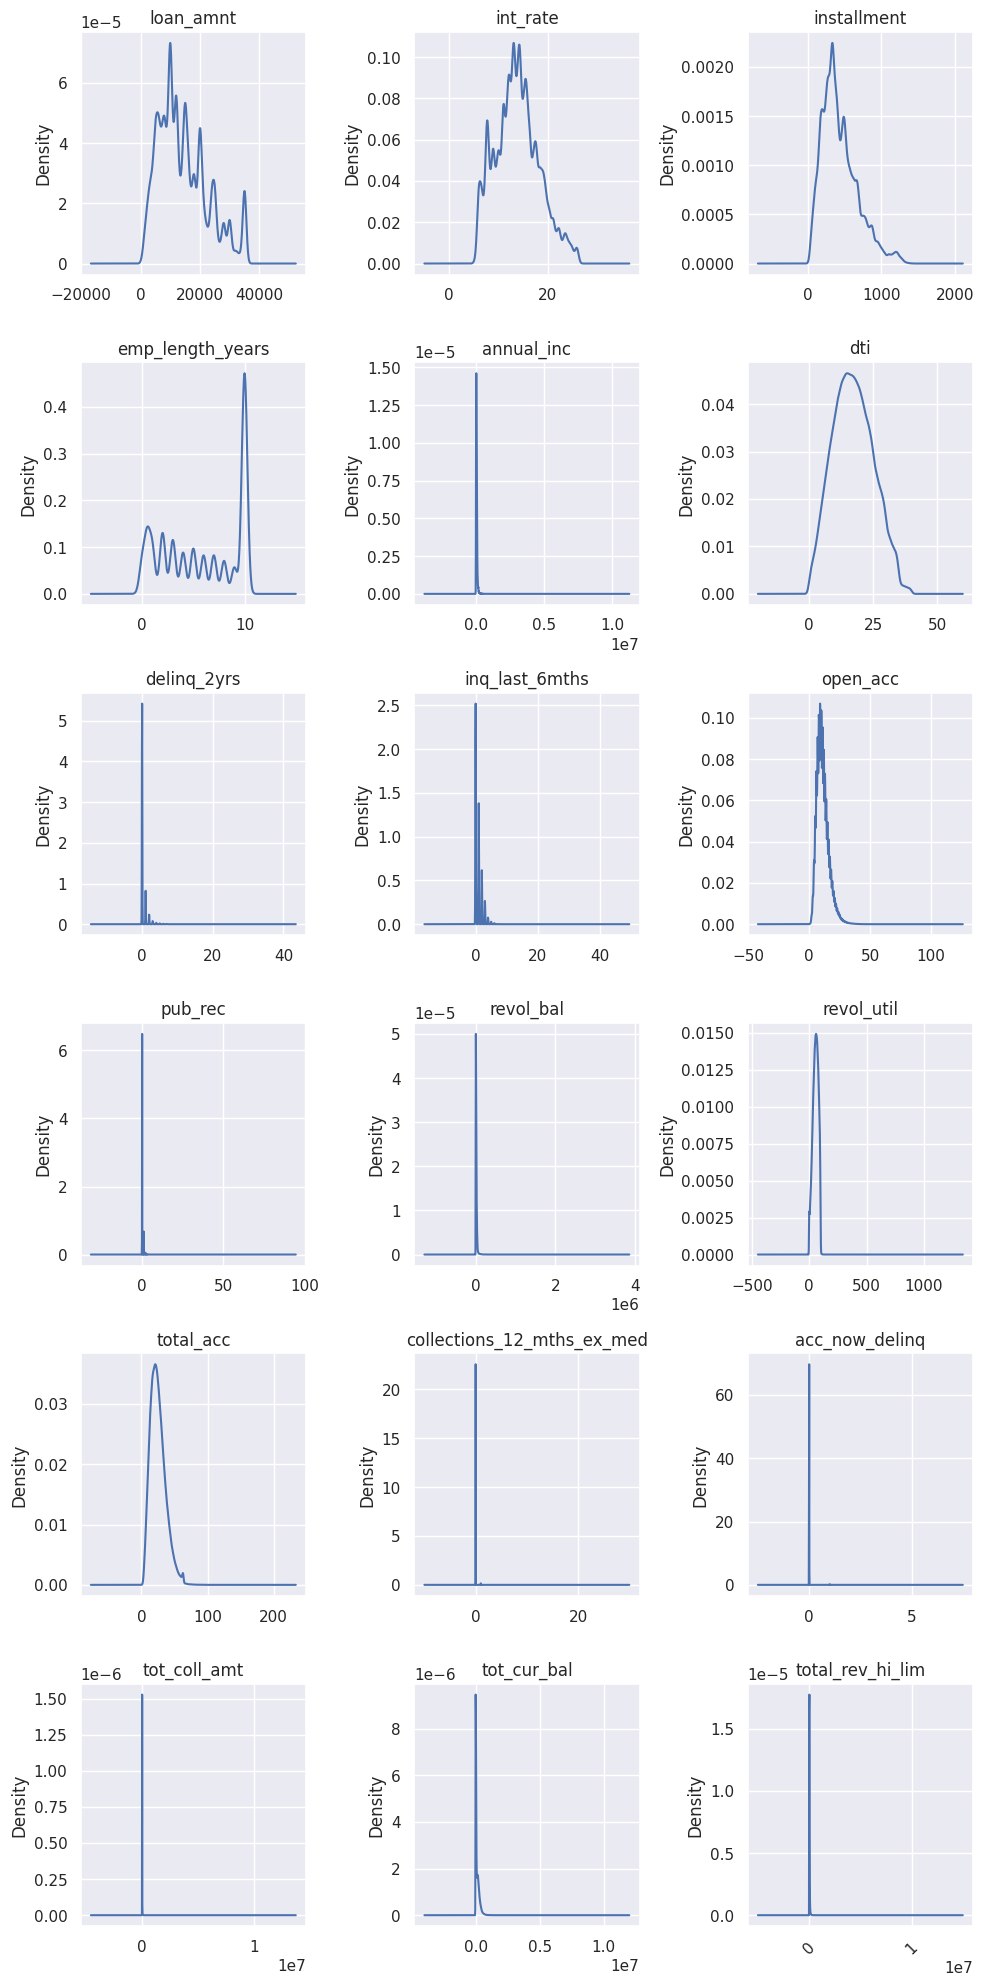

In [40]:
fig,ax = plt.subplots(6,3,figsize=(10,20) ,)
row = col = 0
for n,i in enumerate(numeric_features):

    try:

        if (n%3 == 0) & (n > 0):
            row += 1
            col = 0
        df[i].plot(kind="kde",ax=ax[row,col])
        ax[row,col].set_title(i)
        col += 1

    except:
        pass

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Observation: annual_inc , deling_2yrs , inq_last_6mths contains mostly zero values.**

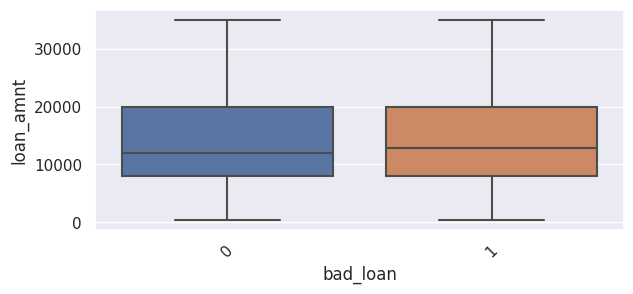

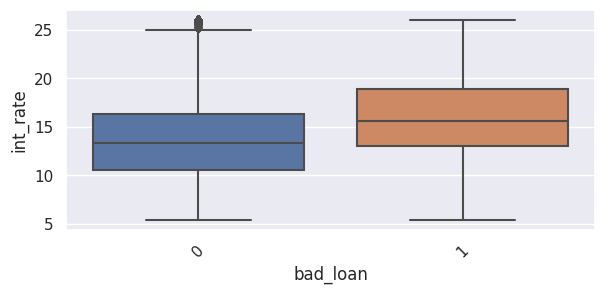

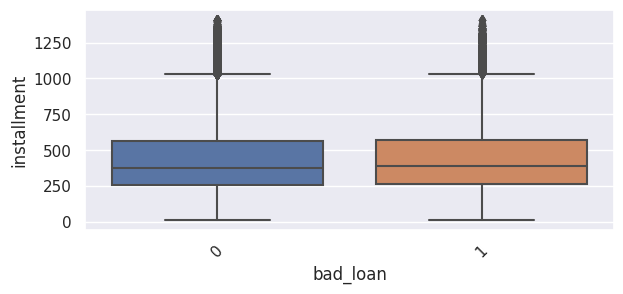

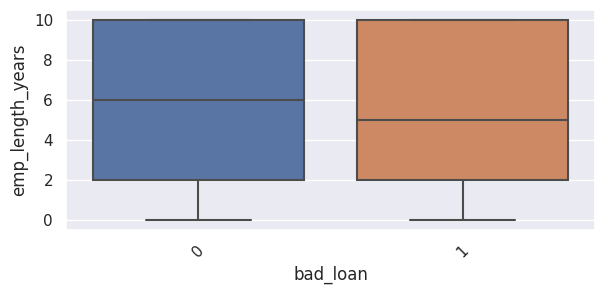

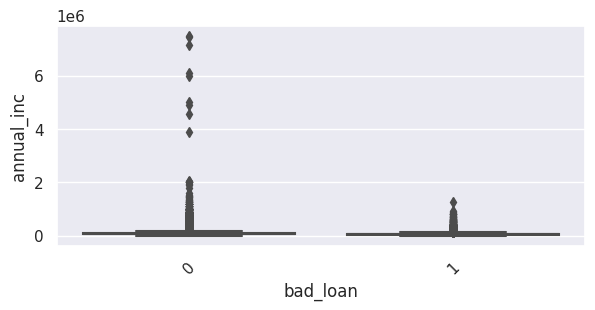

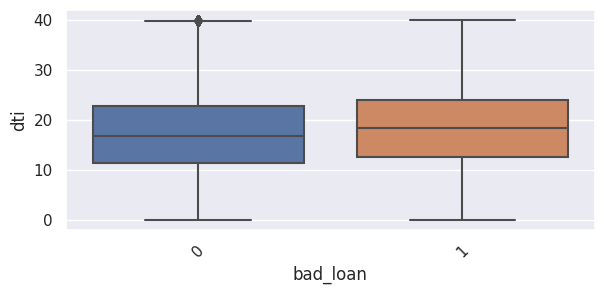

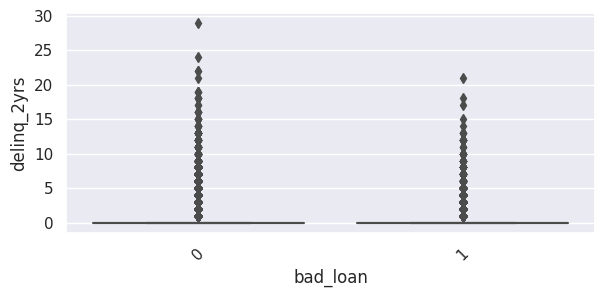

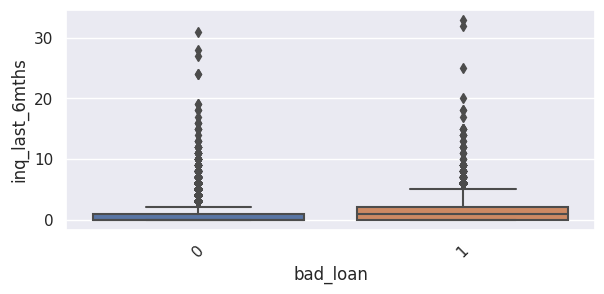

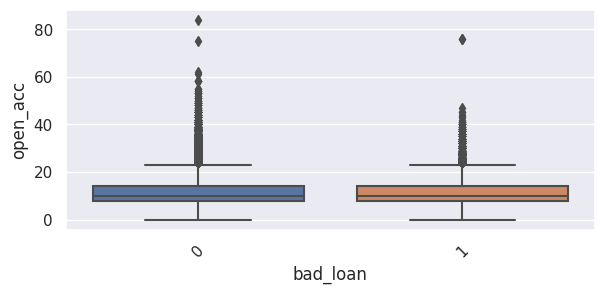

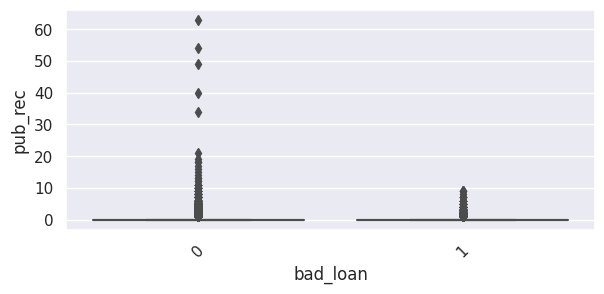

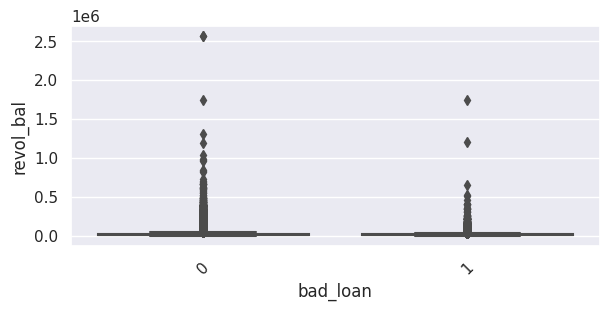

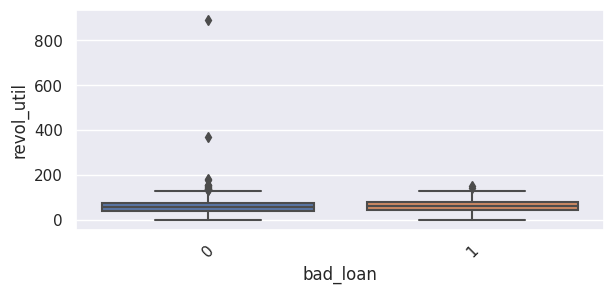

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

<Figure size 1500x2000 with 0 Axes>

In [41]:

for i,f in enumerate(numeric_features):   
    try:
        plt.figure(figsize=(15, 20))

        c=i+1

        plt.subplot(6, 2, c)
        g = sns.boxplot(x=df[target],y=df[f])

        g.set_xticklabels(g.get_xticklabels(), rotation=45);
        plt.xticks(rotation=45)
    except:
        pass
    


    
    
fig.tight_layout()
plt.show()

## Categorical Features Visualization

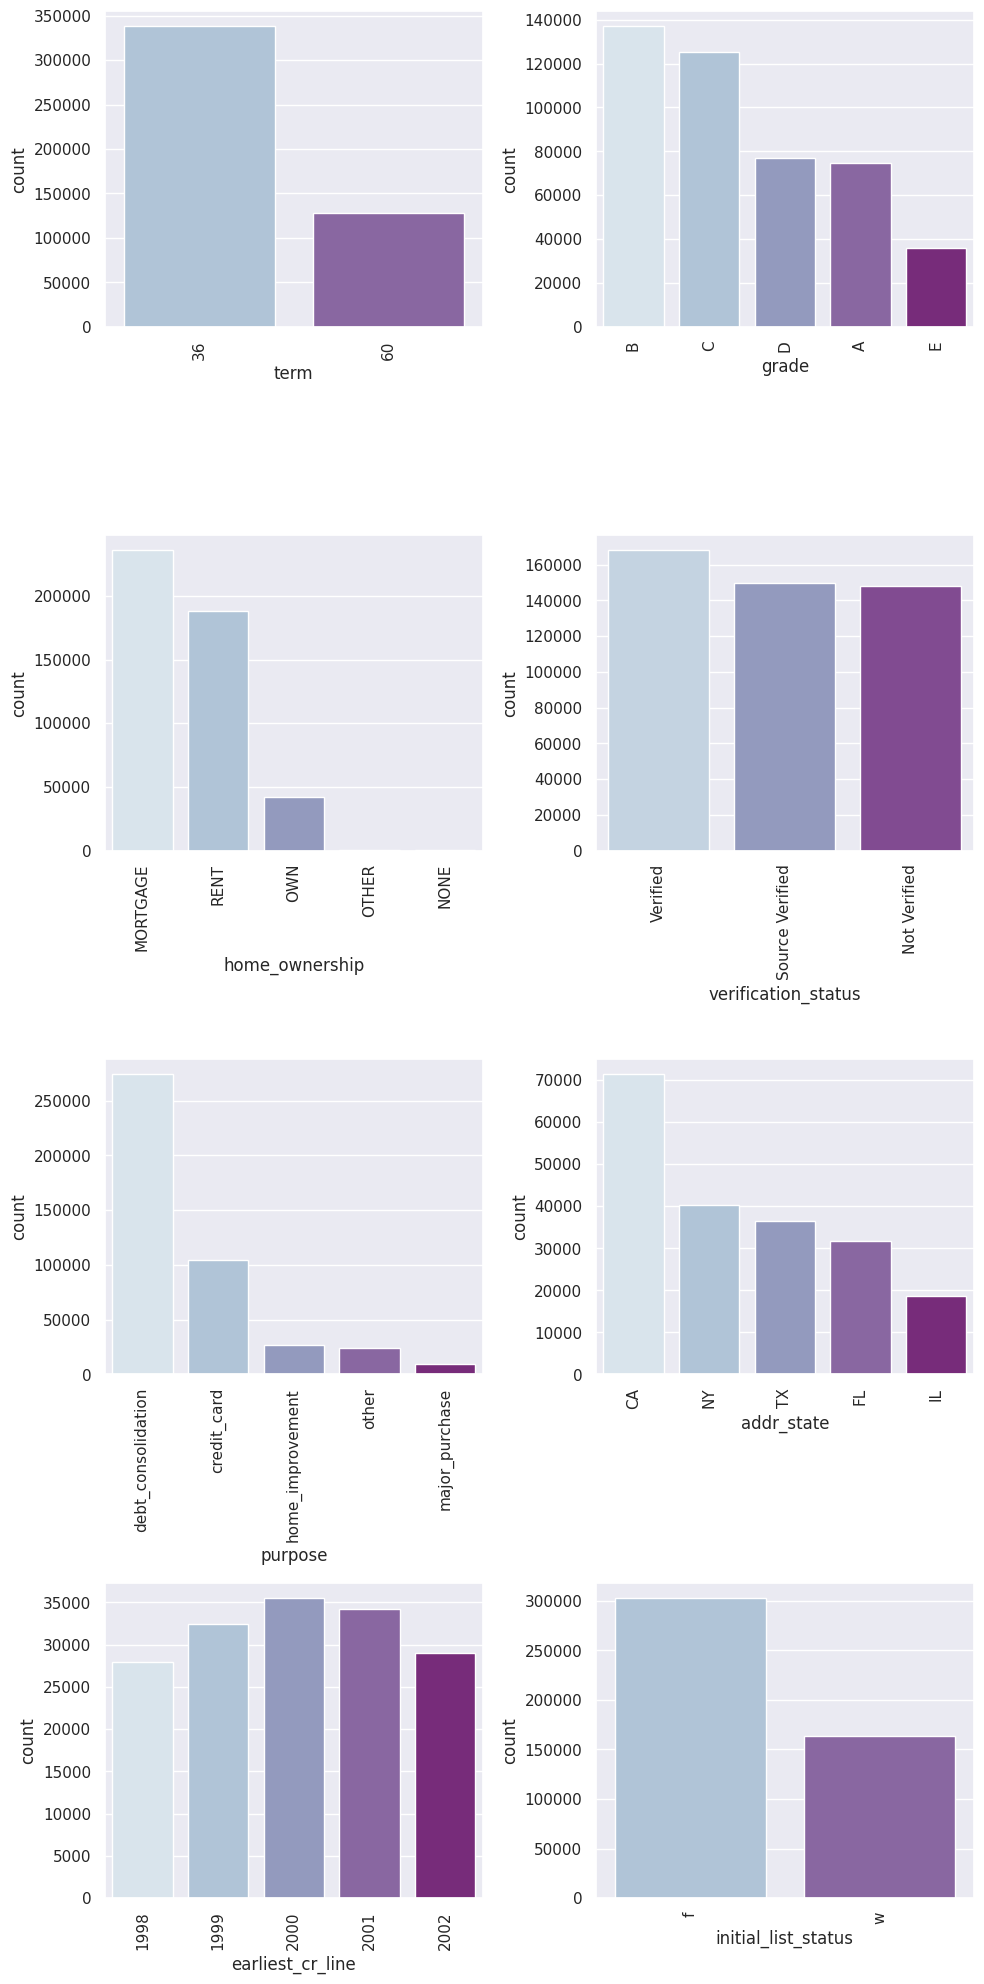

In [42]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

for i, subplots in zip(categorical_features, ax.flatten()):
    g = sns.barplot(x=df[i].value_counts().index[:5], y=df[i].value_counts().values[:5],ax=subplots , palette='BuPu')
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set(xlabel=i , ylabel='count')

fig.tight_layout()
plt.show()

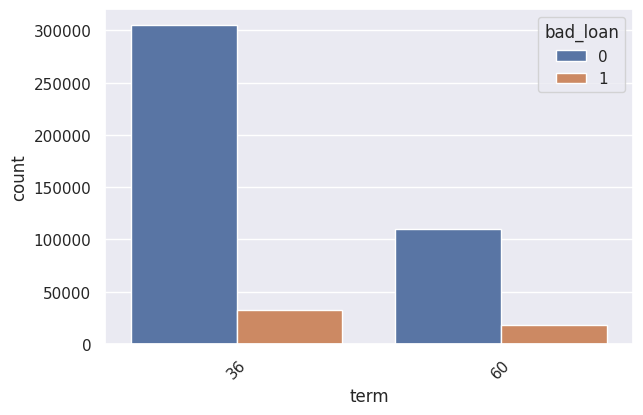

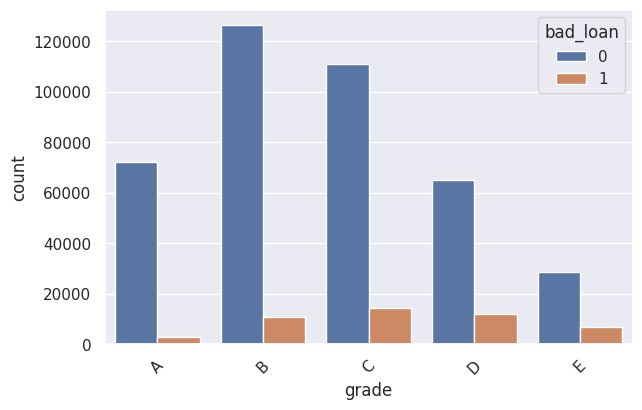

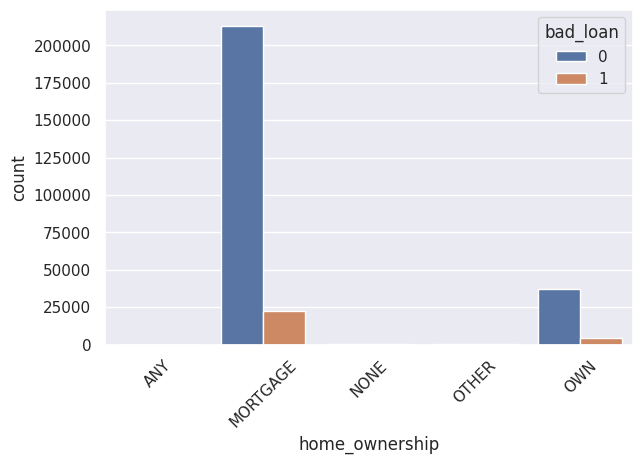

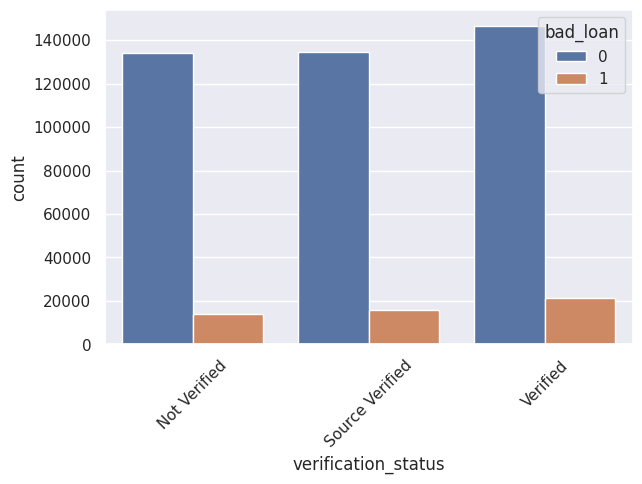

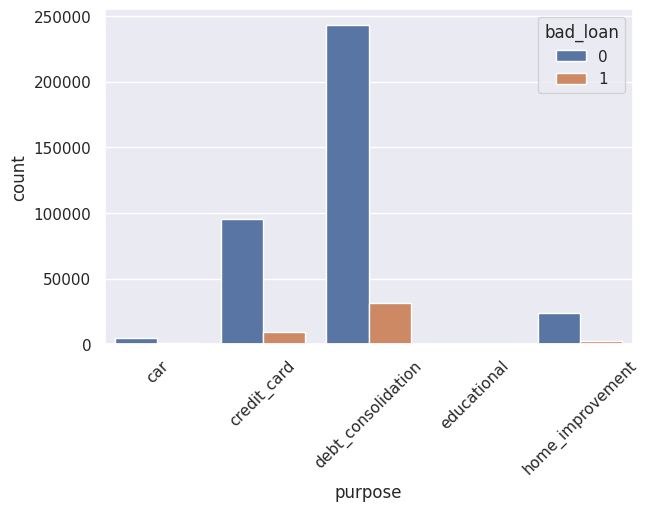

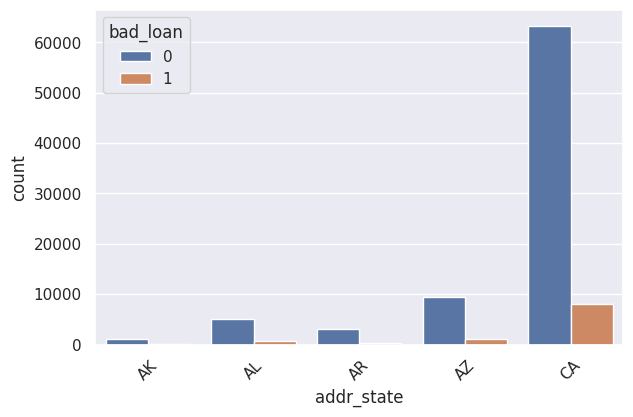

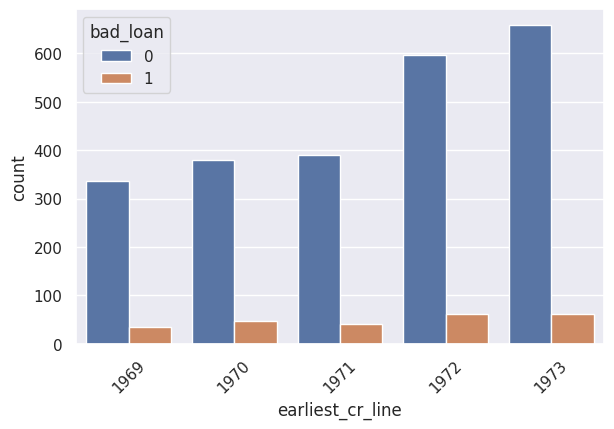

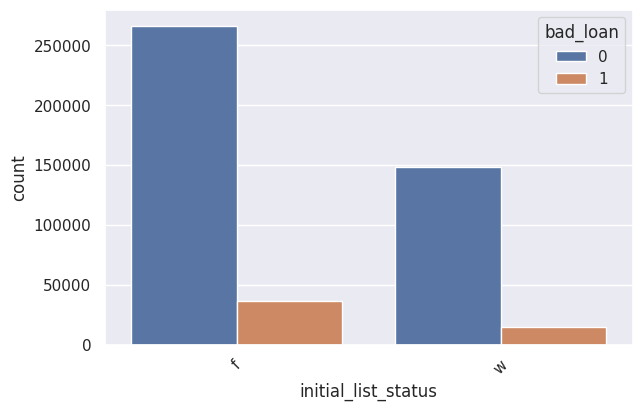

In [43]:
for i,f in enumerate(categorical_features):   
    plt.figure(figsize=(15, 20))

    c=i+1
    
    plt.subplot(4, 2, c)
    a = sorted(df[f].unique().tolist())
    sns.countplot(x=f, data=df, hue=target, order=a[:5])

    g.set_xticklabels(g.get_xticklabels(), rotation=45);
    plt.xticks(rotation=45)
    

# Feature Selection

### Correlation Heatmaps 

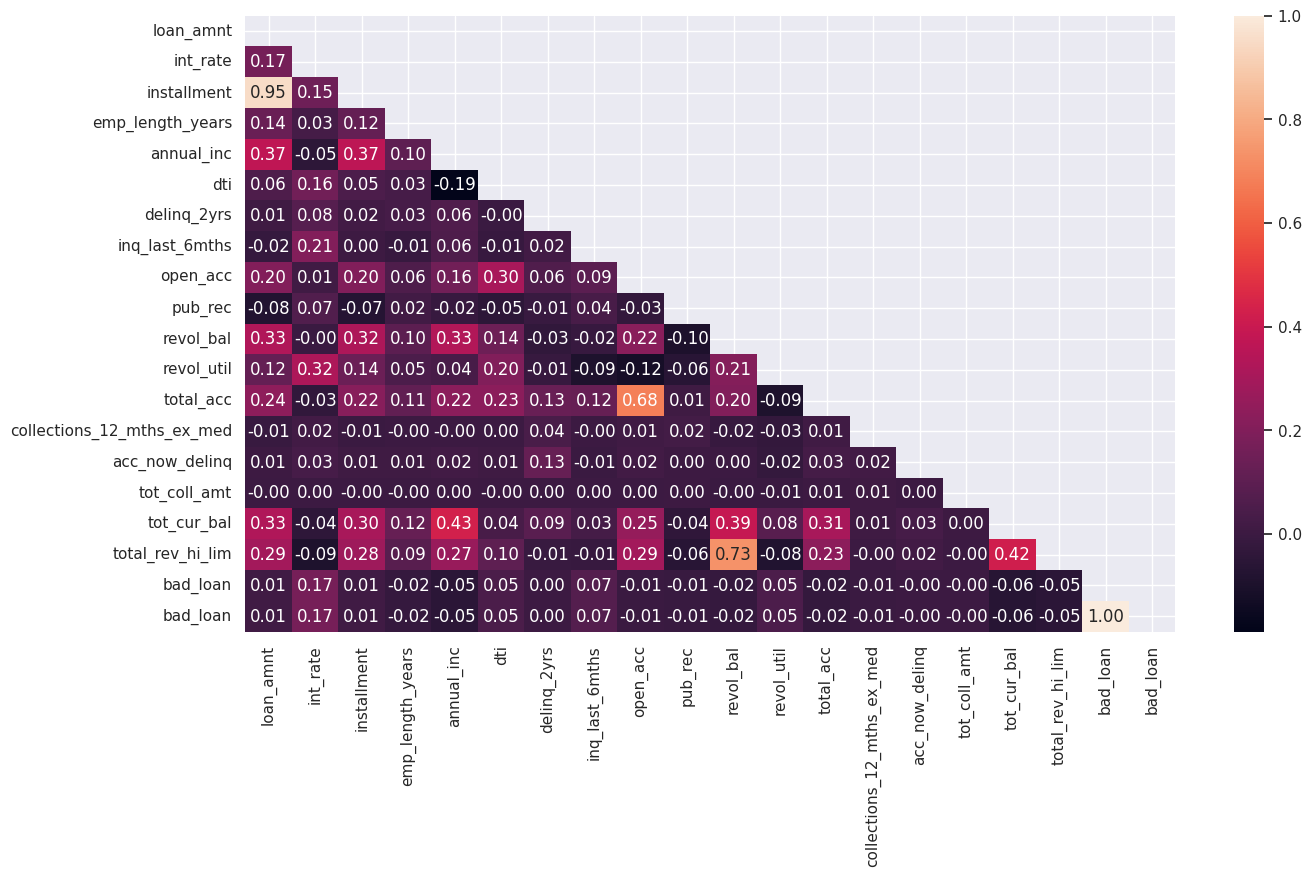

In [44]:
num_tgt = numeric_features.copy()
num_tgt.append(target)
fig = plt.figure(figsize=(15,8))
sns.heatmap(df[num_tgt].corr(method='pearson'),annot=True,fmt='.2f',mask=np.triu(df[num_tgt].corr(method='pearson')),cbar=True)
plt.show()

**Removing Multicolliear Features**

In [45]:
df.drop(columns=['loan_amnt','total_acc','revol_bal'],inplace=True)
df.shape

(466256, 24)

In [46]:
cols = df.select_dtypes(["float64" , "int64",'int32']).columns
df[cols].corr()[target]

int_rate                      0.172367
installment                   0.013936
emp_length_years             -0.020621
annual_inc                   -0.049849
dti                           0.048102
delinq_2yrs                   0.001227
inq_last_6mths                0.073102
open_acc                     -0.006174
pub_rec                      -0.009111
revol_util                    0.049746
collections_12_mths_ex_med   -0.005120
acc_now_delinq               -0.000197
tot_coll_amt                 -0.001394
tot_cur_bal                  -0.063745
total_rev_hi_lim             -0.050329
bad_loan                      1.000000
Name: bad_loan, dtype: float64

### Weight of Evidence (WoE), Information Value (IV)

#### * The weight of evidence measures the predictive power of an independent variable in relation to the dependent variable. It has its roots in credit scoring world and it tells the degree of the separation of good and bad customers. 

#### * Information Value (IV) will help in determining which variables are useful for prediction in the logistic regression model. IV is the measure of overall predictive power of the variables and is very useful for feature selection.

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*hwAVVFsgyqq2jxaLNwg0_A.png'></img>

<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*i2POZ0WJtg19VZxq6I7Tgg.png'></img>

In [47]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = data.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0,ignore_index=True)
        woeDF=pd.concat([woeDF,d], axis=0,ignore_index=True)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(df, target='bad_loan', bins=20)

Information value of term is 0.038862
Information value of int_rate is 0.330939
Information value of installment is 0.007171
Information value of grade is 0.290812
Information value of emp_length_years is 0.006617
Information value of home_ownership is 0.021686
Information value of annual_inc is 0.055064
Information value of verification_status is 0.020833
Information value of purpose is 0.036988
Information value of addr_state is 0.012537
Information value of dti is 0.026301
Information value of delinq_2yrs is 4.5e-05
Information value of earliest_cr_line is 0.016413
Information value of inq_last_6mths is 0.036971
Information value of open_acc is 0.000743
Information value of pub_rec is 0.00058
Information value of revol_util is 0.027327
Information value of initial_list_status is 0.024804
Information value of collections_12_mths_ex_med is 0.000415
Information value of acc_now_delinq is 5.2e-05
Information value of tot_coll_amt is 0.001586
Information value of tot_cur_bal is 0.05671
I

**The rule of thumb says that all variables with IV < 0.02 are not useful for prediction and IV > 0.5 have a suspicious predictive power.**

In [48]:
iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]

,Variable,IV
0,term,0.038862
1,int_rate,0.330939
3,grade,0.290812
5,home_ownership,0.021686
6,annual_inc,0.055064
7,verification_status,0.020833
8,purpose,0.036988
10,dti,0.026301
13,inq_last_6mths,0.036971
16,revol_util,0.027327


In [49]:
col = iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)].iloc[:,0].values
col

array(['term', 'int_rate', 'grade', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'inq_last_6mths',
       'revol_util', 'initial_list_status', 'tot_cur_bal',
       'total_rev_hi_lim'], dtype=object)

In [50]:
data = df[col]
data.head()

,term,int_rate,grade,home_ownership,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,initial_list_status,tot_cur_bal,total_rev_hi_lim
0,36,10.65,B,RENT,24000.0,Verified,credit_card,27.65,1.0,83.7,f,0.0,0.0
1,60,15.27,C,RENT,30000.0,Source Verified,car,1.00,5.0,9.4,f,0.0,0.0
2,36,15.96,C,RENT,12252.0,Not Verified,small_business,8.72,2.0,98.5,f,0.0,0.0
3,36,13.49,C,RENT,49200.0,Source Verified,other,20.00,1.0,21.0,f,0.0,0.0
4,60,12.69,B,RENT,80000.0,Source Verified,other,17.94,0.0,53.9,f,0.0,0.0


In [51]:
data[target] = df[target]

# Feature Extraction

In [52]:
for i in data[col].select_dtypes(include='object').columns:
    print(len(data[i].unique()))

2
7
6
3
14
2


In [53]:
data = pd.get_dummies(data,dtype=float)
data.head()

,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,bad_loan,term_36,term_60,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,1.0,83.7,0.0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,15.27,30000.0,1.00,5.0,9.4,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.96,12252.0,8.72,2.0,98.5,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,13.49,49200.0,20.00,1.0,21.0,0.0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12.69,80000.0,17.94,0.0,53.9,0.0,0.0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Again calculating Information Gain for the dummy columns**

In [54]:
iv, woe = iv_woe(data, target='bad_loan', bins=20)

Information value of int_rate is 0.330939
Information value of annual_inc is 0.055064
Information value of dti is 0.026301
Information value of inq_last_6mths is 0.036971
Information value of revol_util is 0.027327
Information value of tot_cur_bal is 0.05671
Information value of total_rev_hi_lim is 0.060604
Information value of term_36 is 0.038862
Information value of term_60 is 0.038862
Information value of grade_A is 0.145184
Information value of grade_B is 0.045339
Information value of grade_C is 0.001158
Information value of grade_D is 0.037097
Information value of grade_E is 0.050725
Information value of grade_F is 0.038171
Information value of grade_G is 0.014292
Information value of home_ownership_ANY is 1e-05
Information value of home_ownership_MORTGAGE is 0.019241
Information value of home_ownership_NONE is 3.5e-05
Information value of home_ownership_OTHER is 0.000306
Information value of home_ownership_OWN is 1.1e-05
Information value of home_ownership_RENT is 0.019859
Inform

In [55]:
iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]

,Variable,IV
0,int_rate,0.330939
1,annual_inc,0.055064
2,dti,0.026301
3,inq_last_6mths,0.036971
4,revol_util,0.027327
5,tot_cur_bal,0.056710
6,total_rev_hi_lim,0.060604
7,term_36,0.038862
8,term_60,0.038862
9,grade_A,0.145184


In [56]:
col = iv[(iv.iloc[:,1]>0.02)&(iv.iloc[:,1]<0.5)]['Variable'].values
col

array(['int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_util',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_36', 'term_60', 'grade_A',
       'grade_B', 'grade_D', 'grade_E', 'grade_F',
       'initial_list_status_f', 'initial_list_status_w'], dtype=object)

In [57]:
data = data[col]
data.head()

,int_rate,annual_inc,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,term_36,term_60,grade_A,grade_B,grade_D,grade_E,grade_F,initial_list_status_f,initial_list_status_w
0,10.65,24000.0,27.65,1.0,83.7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,15.27,30000.0,1.00,5.0,9.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15.96,12252.0,8.72,2.0,98.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13.49,49200.0,20.00,1.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12.69,80000.0,17.94,0.0,53.9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Model Training

In [58]:
data.columns

Index(['int_rate', 'annual_inc', 'dti', 'inq_last_6mths', 'revol_util',
       'tot_cur_bal', 'total_rev_hi_lim', 'term_36', 'term_60', 'grade_A',
       'grade_B', 'grade_D', 'grade_E', 'grade_F', 'initial_list_status_f',
       'initial_list_status_w'],
      dtype='object')

In [59]:
X  = data.copy()
y = df[target]

X.shape,y.shape

((466256, 16), (466256,))

In [60]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=52)

# checking  imbalance for training dataset
y_train.value_counts()

bad_loan
0    290639
1     35740
Name: count, dtype: int64

In [61]:
#dealing with imbalanced data
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

bad_loan
0    290639
1    290639
Name: count, dtype: int64

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_o,y_train_o)

X_test = scaler.transform(X_test)

In [63]:
X_train

array([[0.26986434, 0.03307549, 0.23530883, ..., 0.        , 0.        ,
        1.        ],
       [0.02955426, 0.01333689, 0.64916229, ..., 0.        , 0.        ,
        1.        ],
       [0.47916667, 0.01066951, 0.35608902, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.52422481, 0.01040277, 0.35783946, ..., 0.        , 1.        ,
        0.        ],
       [0.49370155, 0.01173646, 0.35883971, ..., 0.        , 1.        ,
        0.        ],
       [0.25290698, 0.02107229, 0.39934984, ..., 0.        , 0.        ,
        1.        ]])

In [64]:
#building logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train_o)

LogisticRegression()

In [65]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [66]:
model.score(X_train,y_train_o)

0.6287714312256786

In [67]:
model.score(X_test,y_test)

0.6119519291949356

In [68]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74    124652
           1       0.17      0.64      0.26     15225

    accuracy                           0.61    139877
   macro avg       0.55      0.62      0.50    139877
weighted avg       0.85      0.61      0.69    139877



### precision of class 1  (Bad loan) is very low and need improvement